In [1]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [2]:
import sqlite3
import pandas as pd

# Establish a connection to the database
connection = sqlite3.connect('D:\JHU\Data Science\Term project/airbnb.db')
cursor = connection.cursor()

In [3]:
# Read sqlite query results into a pandas DataFrame
vwListings = pd.read_sql_query("SELECT * from most_recent_listings", connection)

# List the columns in the reviews table
print(vwListings.columns)

Index(['id', 'MAX(last_scraped)', 'source_name', 'scrape_id', 'source', 'name',
       'description', 'neighborhood_overview', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_re

## EDA Listings

In [4]:
vwListings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8628 non-null   int64  
 1   MAX(last_scraped)                             8628 non-null   object 
 2   source_name                                   8628 non-null   object 
 3   scrape_id                                     8628 non-null   int64  
 4   source                                        8628 non-null   object 
 5   name                                          8628 non-null   object 
 6   description                                   8628 non-null   object 
 7   neighborhood_overview                         8628 non-null   object 
 8   host_id                                       8628 non-null   int64  
 9   host_name                                     8628 non-null   o

Use proximity to Washington, DC, attractions and main public transportation, determined by the GPS coordinates of an attraction as secondary data for model development.  

In [5]:
#  the coordinates (latitude, longtitute of a place from google map )
smithsonian_lat = 38.8889532077163
smithsonian_long = -77.0259992316524
lincoln_memorial_lat = 38.8893771334115
lincoln_memorial_long = -77.0501761044084
capitol_lat = 38.8900557831996
capttol_long = -77.0090290467363
white_house_lat = 38.9103145107623
white_house_long = -77.0221504467353
library_of_congress_lat = 38.8888008852652
library_of_congress_long = -77.0047082755724
nationals_park_lat = 38.8731981381059
nationals_park_long = -77.0074329
national_zoo_lat = 38.9294590679026
national_zoo_long = -77.0492384835061
union_station_lat = 38.8973065709087
union_station_long = -77.00629767372
mcpherson_sq_lat = 38.9028682064423
mcpherson_sq_long = -77.0324745881233

In [6]:
import math

In [7]:
# distance unit = miles
vwListings["distance_smitsonian"] = np.arccos(np.sin(np.radians(vwListings["latitude"]))
                                            * np.sin(np.radians(smithsonian_lat)) 
                                            + np.cos(np.radians(vwListings["latitude"]))
                                            *np.cos(np.radians(smithsonian_lat))
                                            *np.cos(np.radians(smithsonian_long-vwListings["longitude"])) )*3963*1.15077945

In [8]:
vwListings["distance_lincoln"] = np.arccos(np.sin(np.radians(vwListings["latitude"]))
                                            * np.sin(np.radians(lincoln_memorial_lat)) 
                                            + np.cos(np.radians(vwListings["latitude"]))
                                            *np.cos(np.radians(lincoln_memorial_lat))
                                            *np.cos(np.radians(lincoln_memorial_long-vwListings["longitude"])) )*3963*1.15077945

In [9]:
vwListings["distance_capitol"] = np.arccos(np.sin(np.radians(vwListings["latitude"]))
                                            * np.sin(np.radians(capitol_lat)) 
                                            + np.cos(np.radians(vwListings["latitude"]))
                                            *np.cos(np.radians(capitol_lat))
                                            *np.cos(np.radians(capttol_long-vwListings["longitude"])) )*3963*1.15077945

In [10]:
vwListings["distance_white_house"] = np.arccos(np.sin(np.radians(vwListings["latitude"]))
                                            * np.sin(np.radians(white_house_lat)) 
                                            + np.cos(np.radians(vwListings["latitude"]))
                                            *np.cos(np.radians(white_house_lat))
                                            *np.cos(np.radians(white_house_long-vwListings["longitude"])) )*3963*1.15077945

In [11]:
vwListings["distance_library_congress"] = np.arccos(np.sin(np.radians(vwListings["latitude"]))
                                            * np.sin(np.radians(library_of_congress_lat)) 
                                            + np.cos(np.radians(vwListings["latitude"]))
                                            *np.cos(np.radians(library_of_congress_lat))
                                            *np.cos(np.radians(library_of_congress_long-vwListings["longitude"])))*3963*1.15077945

In [12]:
vwListings["distance_nationals_park"] = np.arccos(np.sin(np.radians(vwListings["latitude"]))
                                            * np.sin(np.radians(nationals_park_lat)) 
                                            + np.cos(np.radians(vwListings["latitude"]))
                                            *np.cos(np.radians(nationals_park_lat))
                                            *np.cos(np.radians(nationals_park_long-vwListings["longitude"])) )*3963*1.15077945

In [13]:
vwListings["distance_national_zoo"] = np.arccos(np.sin(np.radians(vwListings["latitude"]))
                                            * np.sin(np.radians(national_zoo_lat)) 
                                            + np.cos(np.radians(vwListings["latitude"]))
                                            *np.cos(np.radians(national_zoo_lat))
                                            *np.cos(np.radians(national_zoo_long-vwListings["longitude"])) )*3963*1.15077945

In [14]:
vwListings["distance_railway"] = np.arccos(np.sin(np.radians(vwListings["latitude"]))
                                            * np.sin(np.radians(union_station_lat)) 
                                            + np.cos(np.radians(vwListings["latitude"]))
                                            *np.cos(np.radians(union_station_lat))
                                            *np.cos(np.radians(union_station_long-vwListings["longitude"])) )*3963*1.15077945

In [15]:
vwListings["distance_mcpherson"] = np.arccos(np.sin(np.radians(vwListings["latitude"]))
                                            * np.sin(np.radians(mcpherson_sq_lat)) 
                                            + np.cos(np.radians(vwListings["latitude"]))
                                            *np.cos(np.radians(mcpherson_sq_lat))
                                            *np.cos(np.radians(mcpherson_sq_long-vwListings["longitude"])) )*3963*1.15077945

In [16]:
print(vwListings[["distance_smitsonian","distance_lincoln","distance_capitol","distance_white_house",
                "distance_library_congress","distance_nationals_park","distance_national_zoo",
                "distance_railway","distance_mcpherson"]])

      distance_smitsonian  distance_lincoln  distance_capitol  \
0                2.779604          1.330985          3.804161   
1                3.070495          4.324440          2.462182   
2                2.261485          3.348532          1.764552   
3                1.943004          3.440223          0.915397   
4                7.994612          8.216093          7.893178   
...                   ...               ...               ...   
8623             4.520178          3.495519          5.312878   
8624             5.230639          6.724970          4.175982   
8625             2.236654          2.250682          2.677914   
8626             2.531101          3.433653          2.192536   
8627             3.048533          3.465930          3.065070   

      distance_white_house  distance_library_congress  \
0                 3.178246                   4.082568   
1                 4.265786                   2.247613   
2                 1.097226                   1.8

In [17]:
vwListings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            8628 non-null   int64  
 1   MAX(last_scraped)                             8628 non-null   object 
 2   source_name                                   8628 non-null   object 
 3   scrape_id                                     8628 non-null   int64  
 4   source                                        8628 non-null   object 
 5   name                                          8628 non-null   object 
 6   description                                   8628 non-null   object 
 7   neighborhood_overview                         8628 non-null   object 
 8   host_id                                       8628 non-null   int64  
 9   host_name                                     8628 non-null   o

## EDA : Single Variable 

### number_of_reviews 

Number of review is the number of reviews that listing has. It is the integer number.

In [18]:
vwListings.number_of_reviews.describe()

count    8628.000000
mean       44.930227
std        82.225549
min         0.000000
25%         0.000000
50%        10.000000
75%        51.000000
max       898.000000
Name: number_of_reviews, dtype: float64

The variable distribution is skewed. The mean number of reviews is 45 times, and the median is 10 pounds, or about 78% lower. The 3rd quartile is 51, around 51x the 1st quartile. The minimum is "only" 0, while the maximum is 898. 

In [19]:
vwListings.number_of_reviews.value_counts()

0      2196
1       556
2       346
3       251
4       222
       ... 
547       1
580       1
353       1
516       1
311       1
Name: number_of_reviews, Length: 433, dtype: int64

Let's plot a histogram of the data:

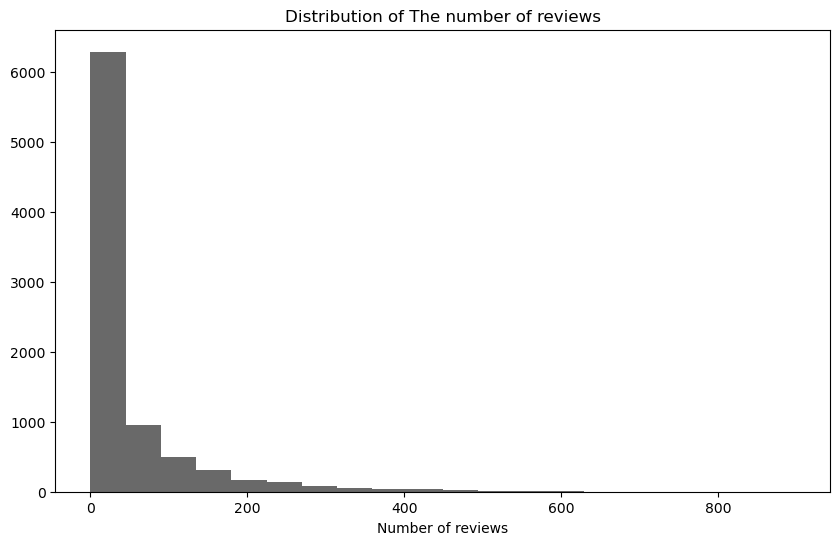

In [20]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.number_of_reviews, color="dimgray", bins = 20)
axes.set_title("Distribution of The number of reviews")
axes.set_xlabel("Number of reviews")

plt.show()
plt.close()

No surprise, the most number of reviews is not reviews. It is not normally distributed. 

### number_of_reviews_ltm

Number of review itm is the number of reviews that listing has in the last 12 months. It is the integer number.

In [21]:
vwListings.number_of_reviews_ltm.describe()

count    8628.000000
mean       12.415739
std        22.207479
min         0.000000
25%         0.000000
50%         2.000000
75%        16.000000
max       561.000000
Name: number_of_reviews_ltm, dtype: float64

The variable distribution is skewed. The mean number of reviews in the last 12 months is 12.4 times, and the median is 2, or about 84% lower. The 3rd quartile is 16. The minimum is "only" 0, while the maximum is 561. 

In [22]:
vwListings.number_of_reviews_ltm.value_counts()

0      3414
1       659
2       430
3       294
4       222
       ... 
118       1
108       1
132       1
136       1
133       1
Name: number_of_reviews_ltm, Length: 135, dtype: int64

Let's plot a histogram of the data:

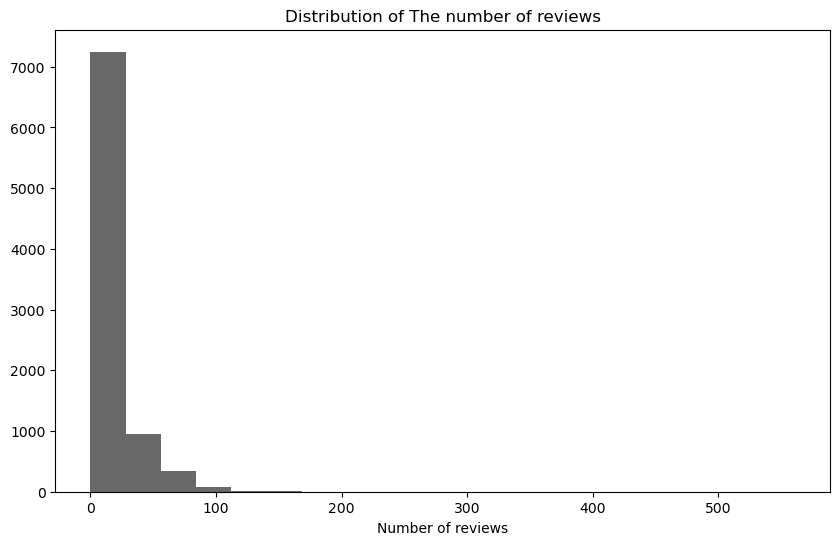

In [23]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.number_of_reviews_ltm, color="dimgray", bins = 20)
axes.set_title("Distribution of The number of reviews")
axes.set_xlabel("Number of reviews")

plt.show()
plt.close()

No surprise, the most number of reviews is not reviews. It is not normally distributed.

### number_of_reviews_l30d

Number of review i30d is the number of reviews that listing has in the last 30 days. It is the integer number.

listings.number_of_reviews_l30d.describe()

The variable distribution is skewed. The mean number of reviews in the last 30 days is 0.89 times, and the median is 0, or about 100% lower. The 3rd quartile is 1. The minimum is "only" 0, while the maximum is 31.

In [24]:
vwListings.number_of_reviews_l30d.value_counts()

0     5948
1      905
2      575
3      445
4      282
5      192
6      109
7       63
8       41
9       31
10      20
11       5
13       4
12       3
14       2
31       1
26       1
15       1
Name: number_of_reviews_l30d, dtype: int64

Let's plot a histogram of the data:

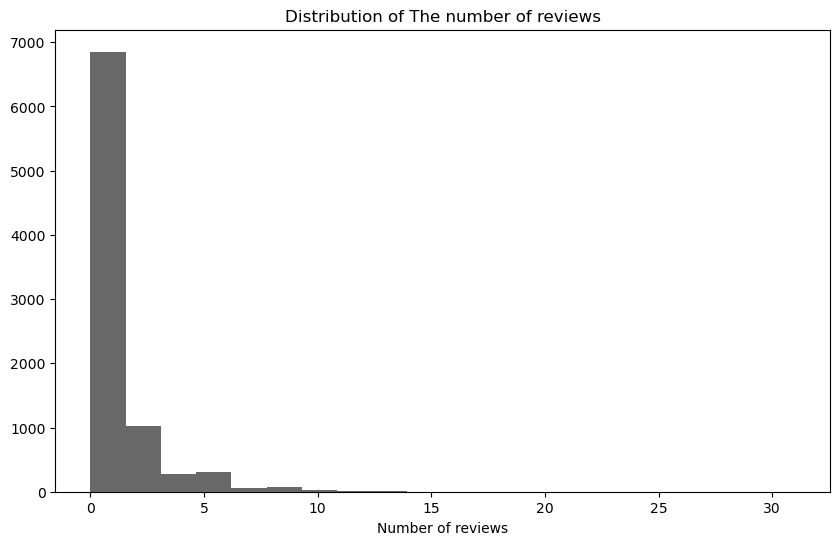

In [25]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.number_of_reviews_l30d, color="dimgray", bins = 20)
axes.set_title("Distribution of The number of reviews")
axes.set_xlabel("Number of reviews")

plt.show()
plt.close()

No surprise, the most number of reviews is not reviews. It is not normally distributed.

### instant_bookable

Instant bookable is boolean: t=true or f=false. It is whether the guest can automatically book the listing without the host requiring to accept their booking request. An indicator of a commercial listing.

In [26]:
vwListings.instant_bookable.describe()

count     8628
unique       2
top          f
freq      5767
Name: instant_bookable, dtype: object

In [27]:
vwListings.instant_bookable.value_counts()

f    5767
t    2861
Name: instant_bookable, dtype: int64

The number of "No" instant bookable is 2 times of The number of "Yes" instant bookable

### calculated_host_listings_count

It is the number of listings that the host has in the current scrape, in the city/region geography.

In [28]:
vwListings.calculated_host_listings_count.describe()

count    8628.000000
mean       32.460362
std        61.670899
min         1.000000
25%         1.000000
50%         2.000000
75%        20.000000
max       235.000000
Name: calculated_host_listings_count, dtype: float64

The variable is definitely skewed. The mean is 32.4 listings and the median is 2 listings, much lower compared with mean. The 3rd quartile is 20x the 1st quartile. The minimum number of listings is "only" 1 listings and the maximum is 235 listings, so there are definitely extremes in the data. Let's count the frequency and plot a histogram of the data: 

In [29]:
vwListings.calculated_host_listings_count.value_counts()

1      3365
2      1014
3       517
173     346
4       344
       ... 
30        3
79        2
22        1
39        1
155       1
Name: calculated_host_listings_count, Length: 63, dtype: int64

The majority of the number of listings that the host has is one listing. Let's plot histogram:

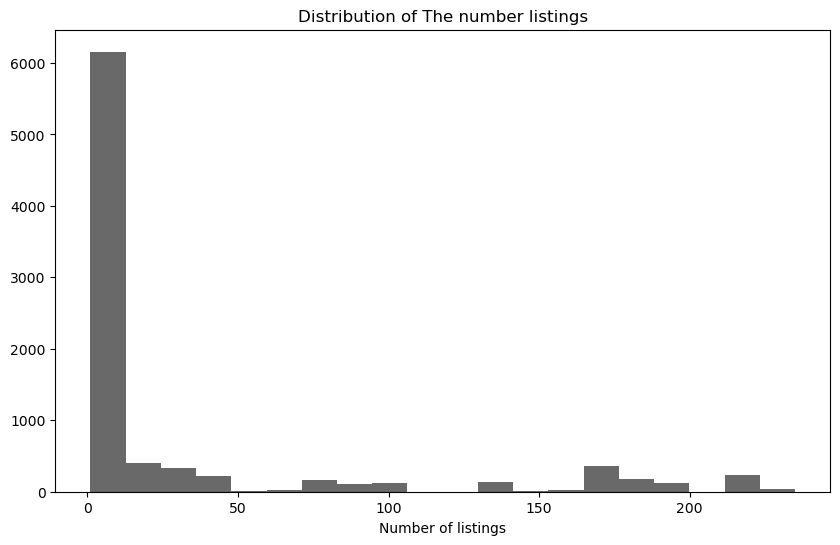

In [30]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.calculated_host_listings_count, color="dimgray", bins = 20)
axes.set_title("Distribution of The number listings")
axes.set_xlabel("Number of listings")

plt.show()
plt.close()

Interesting, there are some hosts that have more than 150 listings, but the most is still one listing..

### calculated_host_listings_count_entire_homes

It is the number of entire home/apt listings that the host has in the current scrape, in the city/region geography.

In [31]:
vwListings.calculated_host_listings_count_entire_homes.describe()

count    8628.000000
mean       24.227167
std        54.530621
min         0.000000
25%         1.000000
50%         1.000000
75%         9.000000
max       235.000000
Name: calculated_host_listings_count_entire_homes, dtype: float64

The variable is definitely skewed. The mean is 24 listings and the median is 1 listing, much lower compared with mean. The 3rd quartile is 9x the 1st quartile. The minimum number of listings is "only" 0 listing and the maximum is 235 listings, so there are definitely extremes in the data. Let's count the frequency and plot a histogram of the data:

In [32]:
vwListings.calculated_host_listings_count_entire_homes.value_counts()

1      3293
0      1316
2       866
3       354
4       234
10      226
221     221
183     183
154     173
5       141
138     138
19      122
6       119
101     106
32       98
94       94
80       80
78       78
35       73
9        72
7        68
16       63
17       59
8        56
29       38
36       36
31       31
235      31
13       26
26       26
20       24
150      24
11       23
15       22
18       18
96       15
157      15
145       9
28        8
214       7
83        7
34        7
33        6
227       5
23        4
37        3
91        3
89        3
79        2
155       1
21        1
Name: calculated_host_listings_count_entire_homes, dtype: int64

The majority of the number of listings that the host has is one listing. Let's plot histogram:

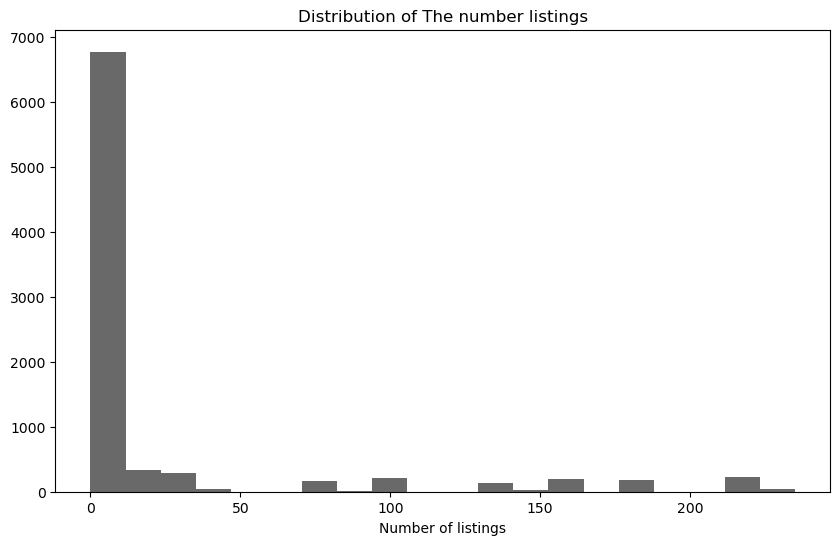

In [33]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.calculated_host_listings_count_entire_homes, color="dimgray", bins = 20)
axes.set_title("Distribution of The number listings")
axes.set_xlabel("Number of listings")

plt.show()
plt.close() 

Interesting, there are some hosts that have more than 150 listings, but the most is still 0 listings.

### calculated_host_listings_count_private_rooms

It is the number of private room listings that the host has in the current scrape, in the city/region geography.

In [34]:
vwListings.calculated_host_listings_count_private_rooms.describe()

count    8628.000000
mean        7.838085
std        30.515164
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       170.000000
Name: calculated_host_listings_count_private_rooms, dtype: float64

The variable is definitely skewed. The mean is 7.8 listings and the median is 0 listing, much lower compared with mean. The 3rd quartile is 1 listing and the 1st quartile is 0 listing. The minimum number of listings is 0 listing and the maximum is 170 listings, so there are definitely extremes in the data. Let's count the frequency and plot a histogram of the data:

In [35]:
vwListings.calculated_host_listings_count_private_rooms.value_counts()

0      5944
1       754
2       299
3       237
13      187
4       174
163     173
170     121
8        85
6        79
38       76
5        75
11       58
7        50
28       45
9        42
42       42
10       29
59       26
17       22
18       20
16       20
14       15
54       15
12       14
46       11
19       10
15        4
39        1
Name: calculated_host_listings_count_private_rooms, dtype: int64

The most number of listings that the host has is 0 listing. Let's plot histogram

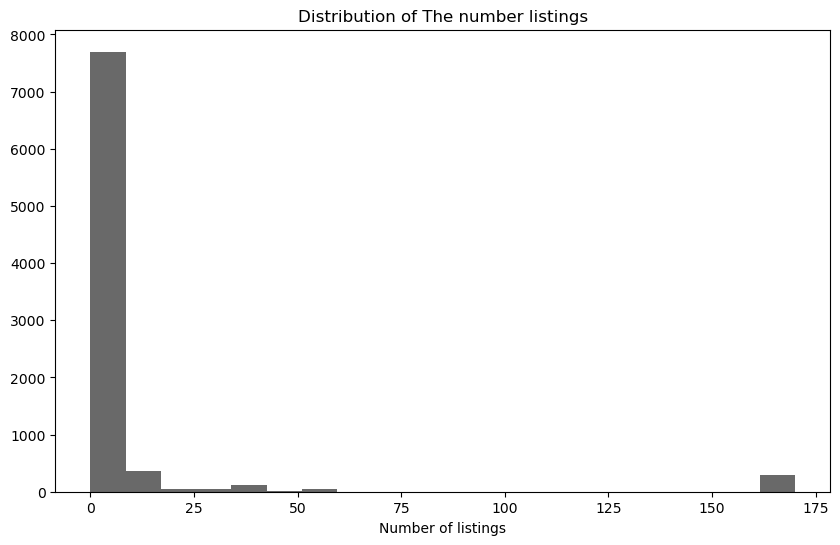

In [36]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.calculated_host_listings_count_private_rooms, color="dimgray", bins = 20)
axes.set_title("Distribution of The number listings")
axes.set_xlabel("Number of listings")

plt.show()
plt.close()

There are some hosts that have more than 150 listings, but the most is still zero.

### calculated_host_listings_count_shared_rooms 

It is the number of shared room listings that the host has in the current scrape, in the city/region geography.

In [37]:
vwListings.calculated_host_listings_count_shared_rooms.describe()

count    8628.000000
mean        0.305865
std         1.798723
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: calculated_host_listings_count_shared_rooms, dtype: float64

The mean is 0.3 listings and the median is 0 listing, lower compared with mean. The 3rd quartile is 0 listing and the 1st quartile is 0 listing. The minimum number of listings is 0 listing and the maximum is 20 listings, so there are definitely extremes in the data. Let's count the frequency and plot a histogram of the data:

In [38]:
vwListings.calculated_host_listings_count_shared_rooms.value_counts()

0     8210
5      179
1       95
16      36
20      22
2       20
9       19
13      16
8       16
4       13
17       2
Name: calculated_host_listings_count_shared_rooms, dtype: int64

The most number of listings that the host has is 0 listing. Let's plot histogram:

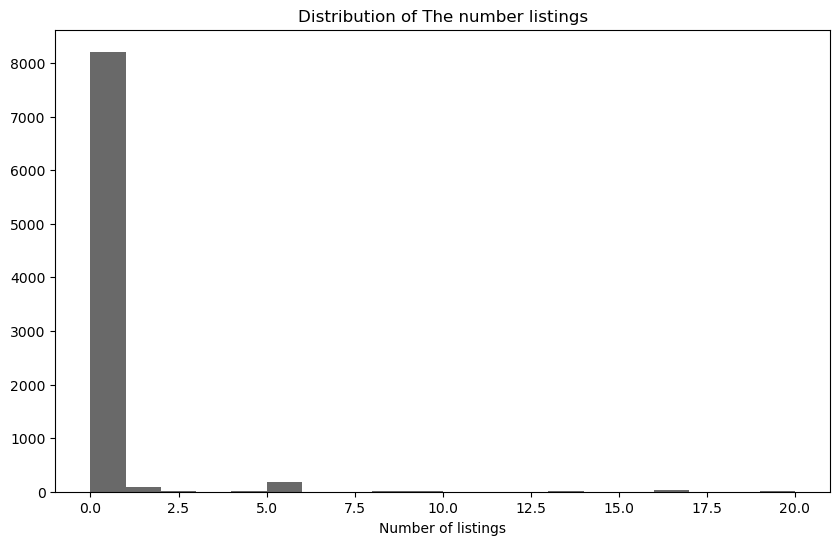

In [39]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.calculated_host_listings_count_shared_rooms, color="dimgray", bins = 20)
axes.set_title("Distribution of The number listings")
axes.set_xlabel("Number of listings")

plt.show()
plt.close()

There are some hosts that have more than 5 listings, but the most is still 0 listings.

### distance_smitsonian

The distance from hosts to Smitsonian is measured in terms of miles.

In [40]:
vwListings.distance_smitsonian.describe()

count    8628.000000
mean        3.207463
std         1.716596
min         0.491451
25%         1.989138
50%         2.634961
75%         4.008759
max         9.480365
Name: distance_smitsonian, dtype: float64

The variable is definitely skewed. The mean is 3.20 miles and the median is 2.64 miles, or about 17.5% lower. The 3rd quartile is nearly 2x the 1st quartile. The minimum distance is "only" 0.49 miles and the maximum is 9.48 miles, so there are definitely extremes in the data. Let's plot a histogram of the data:

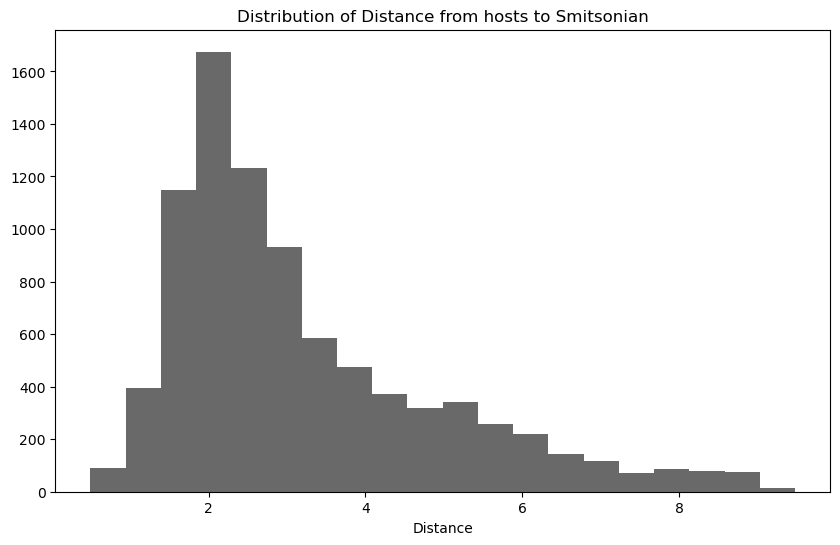

In [41]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.distance_smitsonian, color="dimgray", bins = 20)
axes.set_title("Distribution of Distance from hosts to Smitsonian")
axes.set_xlabel("Distance")

plt.show()
plt.close()

It is seen that the distribution does not appear to be normally distributed. The distance is quite variable among hosts and depends on their location.

### distance_lincoln

The distance from hosts to Lincoln Memorial is measured in terms of miles.

In [42]:
vwListings.distance_lincoln.describe()

count    8628.000000
mean        3.733036
std         1.792500
min         0.568090
25%         2.443712
50%         3.372231
75%         4.555825
max         9.831802
Name: distance_lincoln, dtype: float64

The distribution of distance is slightly skewed. The mean is 3.7 miles and the median is 3.4 miles, or about 9.7% lower. The 3rd quartile is nearly 1.9x the 1st quartile. The minimum distance is "only" 0.57 miles and the maximum is 9.83 miles, so there are definitely extremes in the data. Let's plot a histogram of the data:

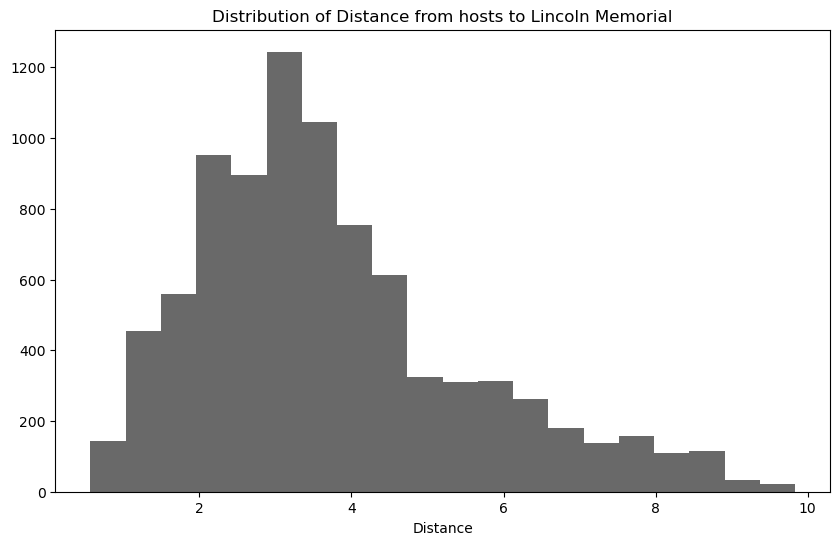

In [43]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.distance_lincoln, color="dimgray", bins = 20)
axes.set_title("Distribution of Distance from hosts to Lincoln Memorial")
axes.set_xlabel("Distance")

plt.show()
plt.close()

The data looks only slightly skewed right. The distance from hosts to the Lincoln Memorial range is quite wide and depends on the location.

### distance_capitol 

The distance from hosts to the capital is measured in terms of miles.

In [44]:
vwListings.distance_capitol.describe()

count    8628.000000
mean        3.078649
std         1.814900
min         0.309378
25%         1.696868
50%         2.735808
75%         4.080094
max         9.611845
Name: distance_capitol, dtype: float64

The variable is definitely skewed. The mean is 3.08 miles and the median is 2.74 miles, or around 11% lower. The 3rd quartile is nearly 2.4x the 1st quartile. The minimum distance is "only" 0.31 miles and the maximum is 9.6 miles, so there are definitely extremes in the data. Let's plot a histogram of the data:

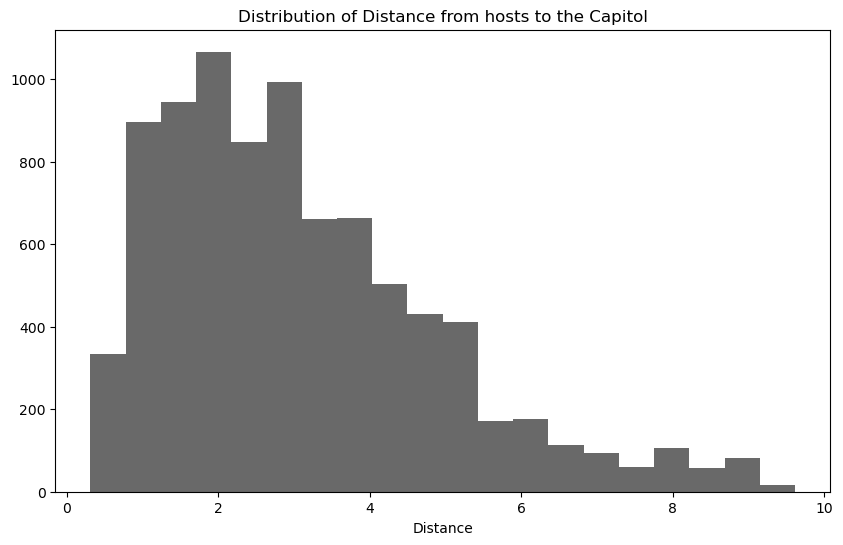

In [45]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.distance_capitol, color="dimgray", bins = 20)
axes.set_title("Distribution of Distance from hosts to the Capitol")
axes.set_xlabel("Distance")

plt.show()
plt.close()

It is seen that the distribution does not appear to be normally distributed. The distance from hosts to the Capitol range is quite wide and depends on the location. It is noticed that there is a lot of distance around 2–3.5 miles, which is quite close to the Capitol.

### distance_white_house

The distance from hosts to the White house is measured in terms of miles.

In [46]:
vwListings.distance_white_house.describe()

count    8628.000000
mean        2.595433
std         1.734933
min         0.004724
25%         1.287329
50%         2.241331
75%         3.439425
max         8.297130
Name: distance_white_house, dtype: float64

The variable is definitely skewed. The mean is 2.60 miles and the median is 2.24 miles, or around 13.9% lower. The 3rd quartile is nearly 2.7x the 1st quartile. The minimum distance is "only" 0.004 miles and the maximum is 8.29 miles, so there are definitely extremes in the data. Let's plot a histogram of the data:

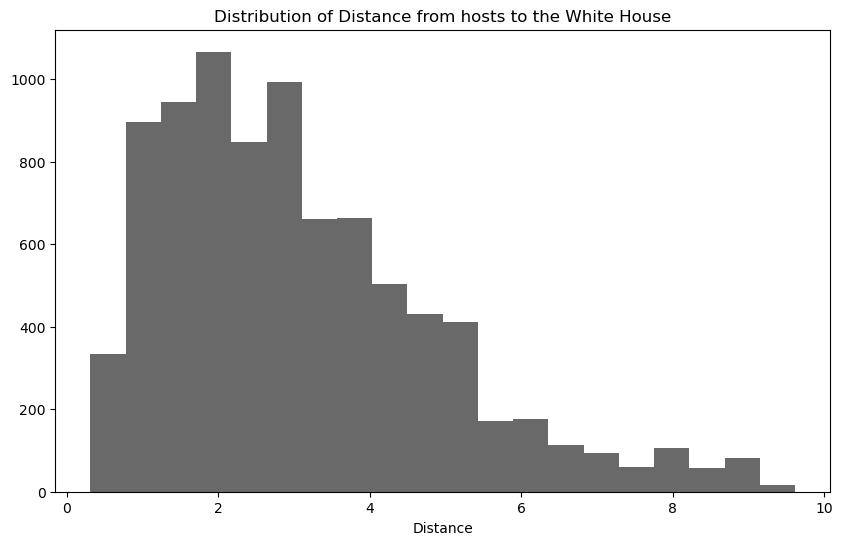

In [47]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.distance_capitol, color="dimgray", bins = 20)
axes.set_title("Distribution of Distance from hosts to the White House")
axes.set_xlabel("Distance")

plt.show()
plt.close()

The data looks only left-skewed distribution. The distance from hosts to the White House range is quite wide and depends on the location.

### distance_library_congress

The distance from hosts to the Library Congress is measured in terms of miles.

In [48]:
vwListings.distance_library_congress.describe()

count    8628.000000
mean        3.152621
std         1.871045
min         0.072757
25%         1.727845
50%         2.943332
75%         4.154711
max         9.780604
Name: distance_library_congress, dtype: float64

The minimum distance is 0.07 and the maximum is 9.78 miles, so there may be a few extremes in the data, but the main concentration of data indicates that the data may be slightly skewed. The mean is 3.15 miles, and the median is nearly that at 2.94 miles. The first quartile is 1.73 miles and the third quartile is 4.15 miles, both about equidistant from the median or mean.

Let's plot the data using a histogram:

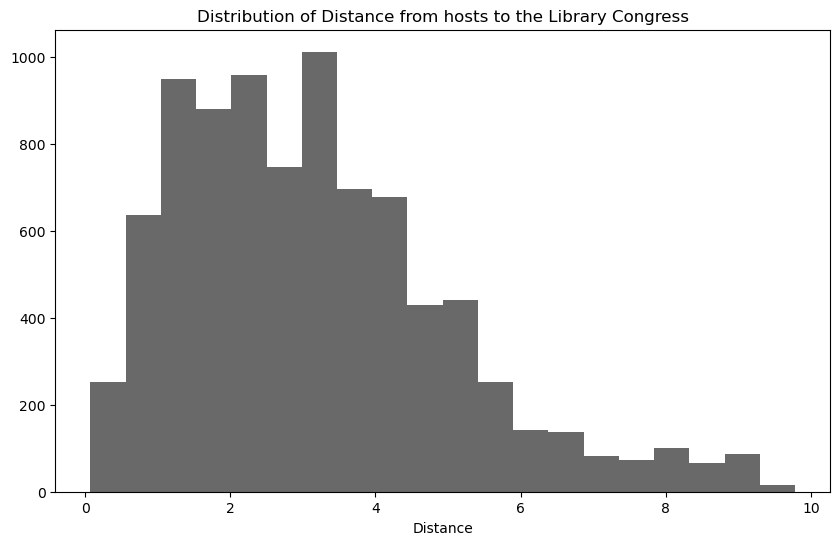

In [49]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.distance_library_congress, color="dimgray", bins = 20)
axes.set_title("Distribution of Distance from hosts to the Library Congress")
axes.set_xlabel("Distance")

plt.show()
plt.close()

The data looks only left-skewed distribution. The distance from hosts to the Library Congress range is quite wide and depends on the location.

### distance_nationals_park

The distance from hosts to the Nationals Park is measured in terms of miles.

In [50]:
vwListings.distance_nationals_park.describe()

count    8628.000000
mean        3.932008
std         1.956942
min         0.065556
25%         2.656350
50%         3.641738
75%         4.920919
max        10.936207
Name: distance_nationals_park, dtype: float64

The minimum distance is 0.07 and the maximum is 10.94 miles, so there may be a few extremes in the data, but the main concentration of data indicates that the data may be normally distribution. The mean is 3.93 miles, and the median is nearly that at 3.64 miles. The first quartile is 2.66 miles and the third quartile is 4.92 miles, both about equidistant from the median or mean.

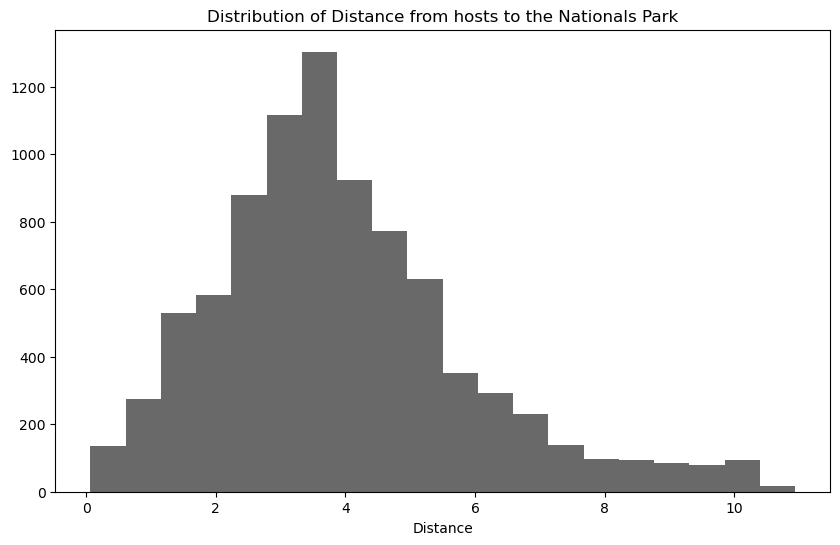

In [51]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.distance_nationals_park, color="dimgray", bins = 20)
axes.set_title("Distribution of Distance from hosts to the Nationals Park")
axes.set_xlabel("Distance")

plt.show()
plt.close()

The distribution looks very nearly normal but slightly skewed left.

### distance_national_zoo

The distance from hosts to the Nationals Zoo is measured in terms of miles.

In [52]:
vwListings.distance_national_zoo.describe()

count    8628.000000
mean        3.463136
std         1.940522
min         0.122430
25%         1.924544
50%         3.133864
75%         4.614035
max        10.361138
Name: distance_national_zoo, dtype: float64

The variable is definitely skewed. The mean is 3.46 miles and the median is 3.13 miles, or around 9.5% lower. The 3rd quartile is nearly 2.4x the 1st quartile. The minimum distance is "only" 0.12 miles and the maximum is 10.36 miles, so there are definitely extremes in the data. Let's plot a histogram of the data:

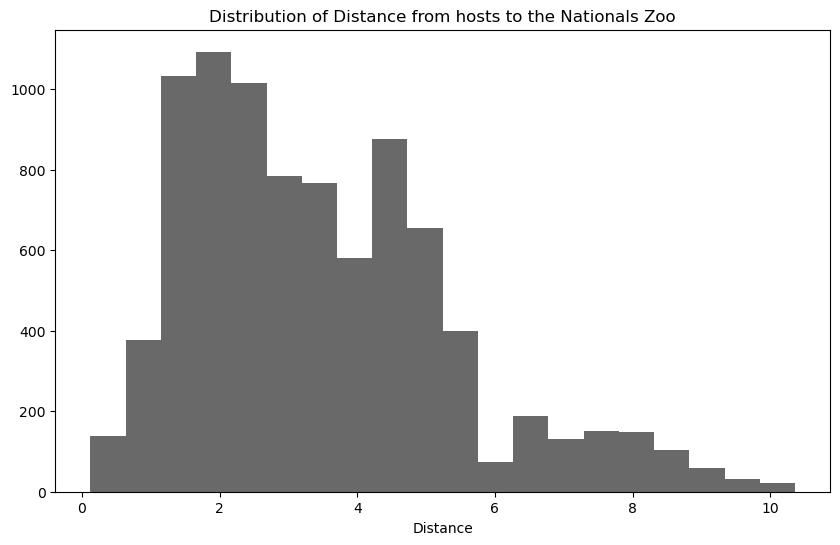

In [53]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.distance_national_zoo, color="dimgray", bins = 20)
axes.set_title("Distribution of Distance from hosts to the Nationals Zoo")
axes.set_xlabel("Distance")

plt.show()
plt.close()

It is seen that the distribution does not appear to be normally distributed. A distance range is quite wide and depends on the location. 

### distance_railway

The distance from hosts to the Main DC railway station (Union Station) is measured in terms of miles.

In [54]:
vwListings.distance_railway.describe()

count    8628.000000
mean        2.848480
std         1.785090
min         0.137688
25%         1.474935
50%         2.573879
75%         3.866996
max         9.103872
Name: distance_railway, dtype: float64

The variable is slightly skewed. The mean is 2.84 miles and the median is 2.57 miles, or around 9% lower. The 3rd quartile is nearly 2.6x the 1st quartile. The minimum distance is "only" 0.14 miles and the maximum is 9.10 miles, so there are definitely extremes in the data. Let's plot a histogram of the data:

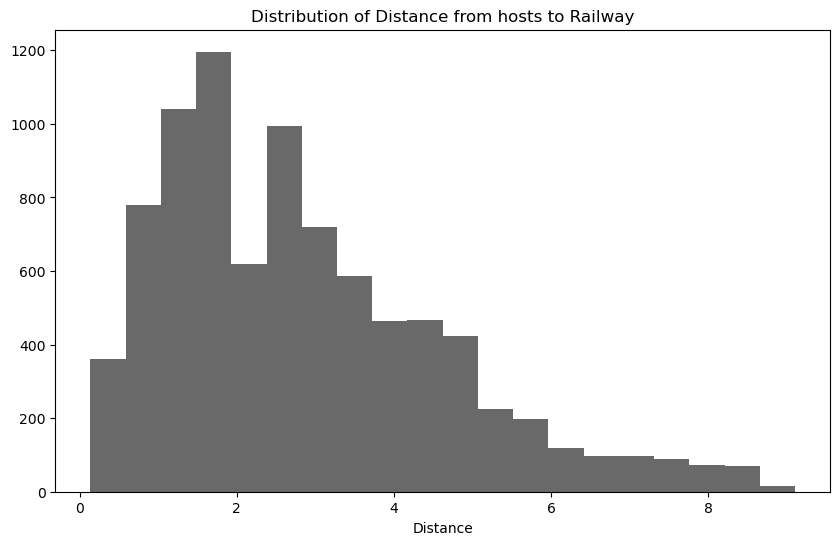

In [55]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.distance_railway, color="dimgray", bins = 20)
axes.set_title("Distribution of Distance from hosts to Railway")
axes.set_xlabel("Distance")

plt.show()
plt.close()

The data looks only left-skewed distribution. The distance from hosts to the Main DC railway station (Union Station) range is quite wide and depends on the location.

### distance_mcpherson 

The distance from hosts to Mcpherson Sq Metro Station (station is the nearest one to Downtown Washington DC) is measured in terms of miles.

In [56]:
vwListings.distance_mcpherson.describe()

count    8628.000000
mean        2.826591
std         1.762295
min         0.089814
25%         1.485653
50%         2.415451
75%         3.619191
max         8.810736
Name: distance_mcpherson, dtype: float64

The variable is slightly skewed. The mean is 2.83 miles and the median is 2.41 miles, or around 13% lower. The 3rd quartile is nearly 2.4x the 1st quartile. The minimum distance is "only" 0.09 miles and the maximum is 8.8 miles, so there are definitely extremes in the data. Let's plot a histogram of the data:

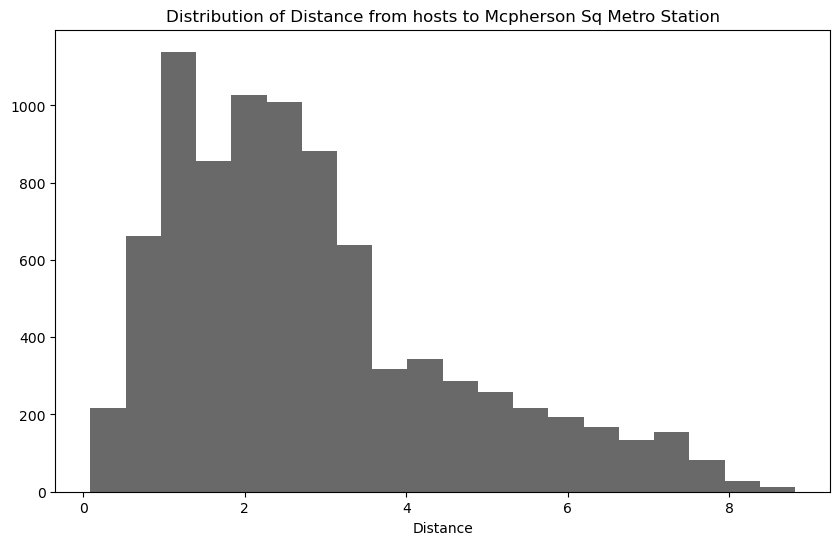

In [57]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(vwListings.distance_mcpherson, color="dimgray", bins = 20)
axes.set_title("Distribution of Distance from hosts to Mcpherson Sq Metro Station")
axes.set_xlabel("Distance")

plt.show()
plt.close()

It is seen that the distribution does not appear to be normally distributed. The distance from hosts to the Mcpherson Sq Metro Station range is quite wide and depends on the location. It is noticed that there is a lot of distance around 1–3 miles, which is quite close to the Capitol.

## Pairwiswe EDA 

As the target variable is price, we will focus on every variable in relation to price.

### Price vs. distance_smitsonian

We expect that distance to attraction is inversely proportional to price. The longer the distance, the lower the price.

Let's look first at correlation coefficients, for which we expect an inverse relation between price and distance.

we have to convert type of listing.price from object to float 

In [58]:
dollar ='$'
vwListings.price = [elem.replace(dollar,'') for elem in vwListings.price]
comma = ','
vwListings.price = [elem.replace(comma,'') for elem in vwListings.price]

In [59]:
vwListings.price 

0       200.00
1        67.00
2        85.00
3        90.00
4        40.00
         ...  
8623    172.00
8624    480.00
8625    173.00
8626     82.00
8627    108.00
Name: price, Length: 8628, dtype: object

In [60]:
vwListings['price'] = np.array(vwListings['price'], dtype=float) 

In [61]:
vwListings['price']

0       200.0
1        67.0
2        85.0
3        90.0
4        40.0
        ...  
8623    172.0
8624    480.0
8625    173.0
8626     82.0
8627    108.0
Name: price, Length: 8628, dtype: float64

In [62]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.distance_smitsonian)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.distance_smitsonian)[0])

r   =  -0.13221810305206694
rho =  -0.3211560855283485


Pearson's correlation coefficient, 𝑟 , is at -0.13, which indicates a weak negative relationship. Spearman's is also interesting at -0.32, which might indicate a weak monotonic relationship. Let's plot the data:

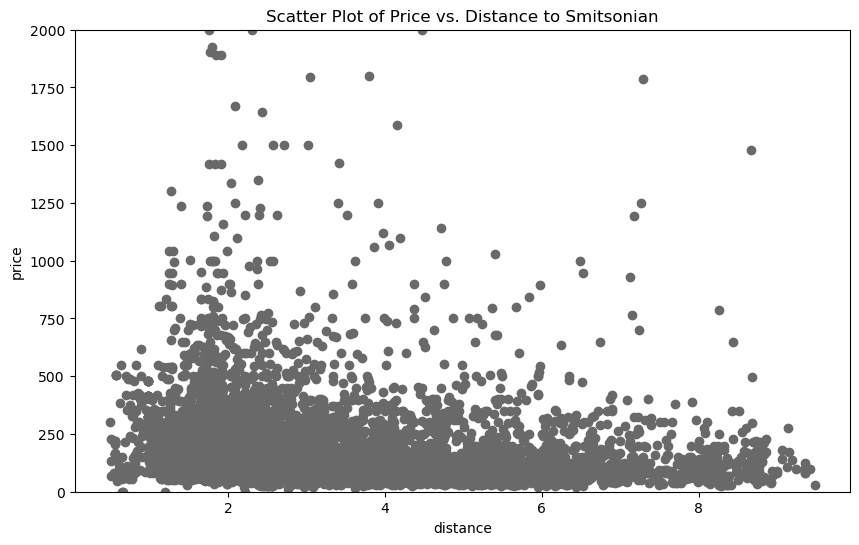

In [63]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( vwListings.distance_smitsonian, vwListings.price, marker="o", color="dimgray")

plt.ylim(0,2000)
axes.set_ylabel("price")
axes.set_xlabel("distance")
axes.set_title("Scatter Plot of Price vs. Distance to Smitsonian")

plt.show()
plt.close()

There appears to be no relationship between price and distance as the data spreads in an unclear pattern.

### Price vs. distance_lincoln

We expect that distance to attraction is inversely proportional to price. The longer the distance, the lower the price.

Let's look first at correlation coefficients, for which we expect an inverse relation between price and distance.

In [64]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.distance_lincoln)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.distance_lincoln)[0])

r   =  -0.1453077133898655
rho =  -0.3070230069451968


Pearson's correlation coefficient, 𝑟 , is at -0.14, which indicates a weak negative relationship. Spearman's is also interesting at -0.31, which might indicate a weak monotonic relationship. Let's plot the data:

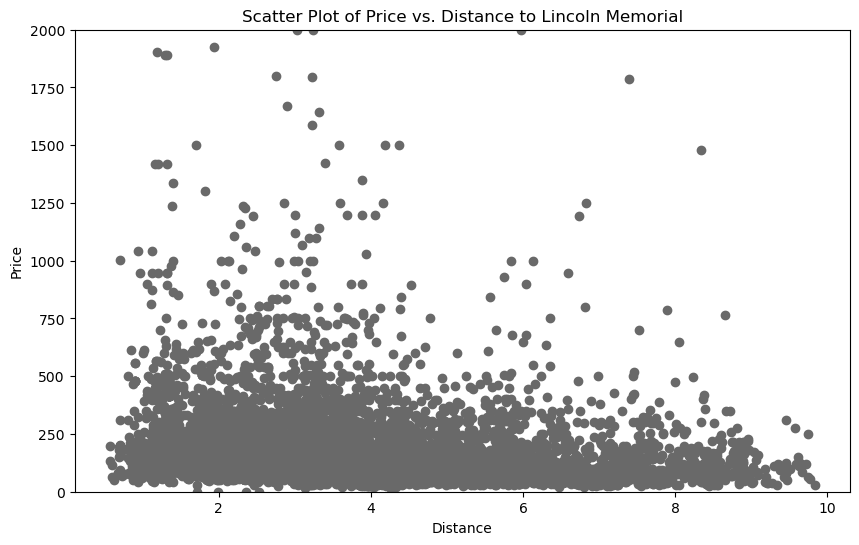

In [65]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(vwListings.distance_lincoln, vwListings.price, marker="o", color="dimgray")

axes.set_ylabel("Price")
axes.set_xlabel("Distance")
axes.set_title("Scatter Plot of Price vs. Distance to Lincoln Memorial")
plt.ylim(0,2000)
plt.show()
plt.close()

There appears to be no relationship between price and distance as the data spreads in an unclear pattern.

### Price vs. distance_white_house

We expect that distance to attraction is inversely proportional to price. The longer the distance, the lower the price.

Let's look first at correlation coefficients, for which we expect an inverse relation between price and distance.

In [66]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.distance_white_house)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.distance_white_house)[0])

r   =  -0.09821190799355087
rho =  -0.22067135771540067


Pearson's correlation coefficient, 𝑟 , is at -0.09, which indicates a weak negative relationship. Spearman's is also interesting at -0.22, which might indicate a weak monotonic relationship. Let's plot the data:

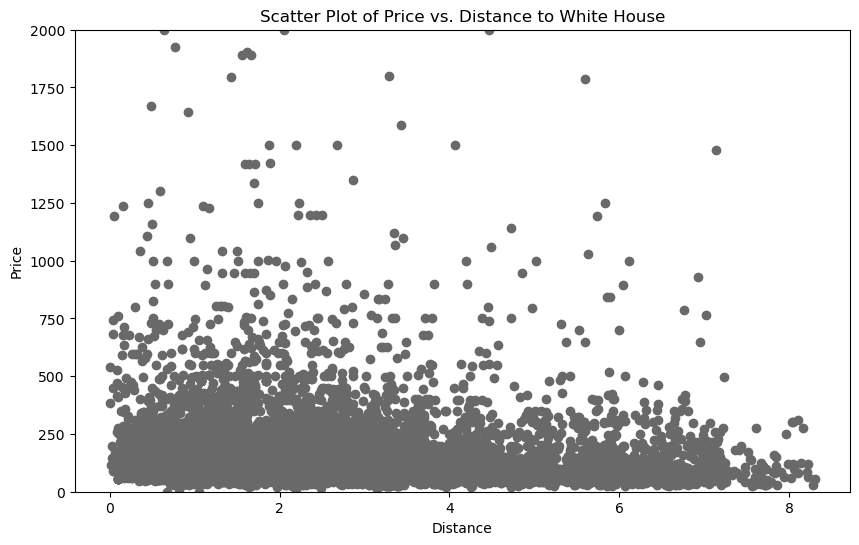

In [67]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(vwListings.distance_white_house, vwListings.price, marker="o", color="dimgray")

axes.set_ylabel("Price")
axes.set_xlabel("Distance")
axes.set_title("Scatter Plot of Price vs. Distance to White House")
plt.ylim(0,2000)
plt.show()
plt.close()

There appears to be no relationship between price and distance as the data spreads in an unclear pattern.

### Price vs. distance_library_congress

We expect that distance to attraction is inversely proportional to price. The longer the distance, the lower the price.

Let's look first at correlation coefficients, for which we expect an inverse relation between price and distance.

In [68]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.distance_library_congress)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.distance_library_congress)[0])

r   =  -0.09014961403749996
rho =  -0.2173812860828018


Pearson's correlation coefficient, 𝑟 , is at -0.09, which indicates a weak negative relationship. Spearman's is also interesting at -0.22, which might indicate a weak monotonic relationship. Let's plot the data:

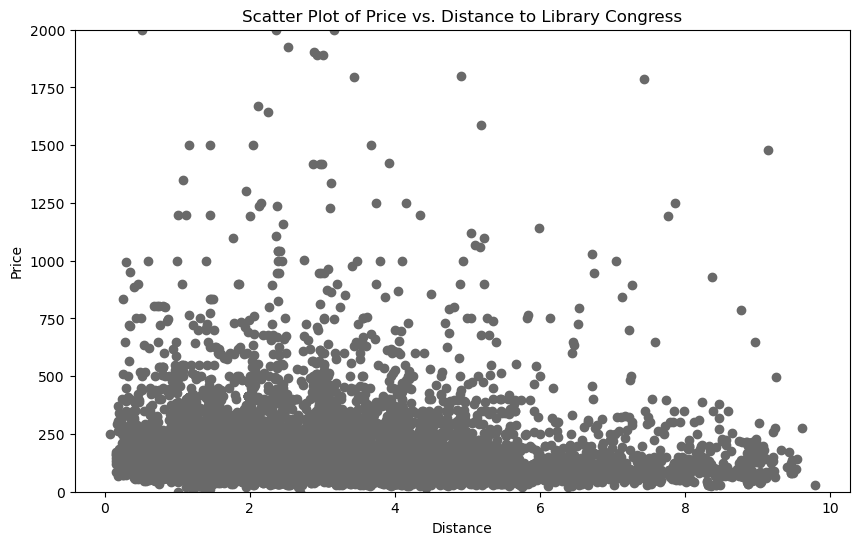

In [69]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(vwListings.distance_library_congress, vwListings.price, marker="o", color="dimgray")

axes.set_ylabel("Price")
axes.set_xlabel("Distance")
axes.set_title("Scatter Plot of Price vs. Distance to Library Congress")
plt.ylim(0,2000)
plt.show()
plt.close()

There appears to be no relationship between price and distance as the data spreads in an unclear pattern.

### Price vs. distance_nationals_park

We expect that distance to attraction is inversely proportional to price. The longer the distance, the lower the price.

Let's look first at correlation coefficients, for which we expect an inverse relation between price and distance.

In [70]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.distance_nationals_park)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.distance_nationals_park)[0])

r   =  -0.08878737420434739
rho =  -0.1967313829667515


Pearson's correlation coefficient, 𝑟 , is at -0.09, which indicates a weak negative relationship. Spearman's is also interesting at -0.20, which might indicate a weak monotonic relationship. Let's plot the data:

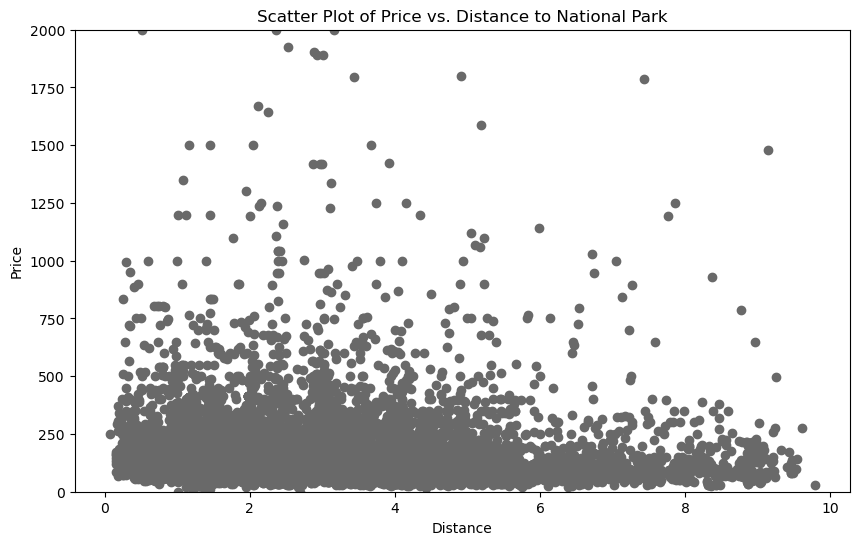

In [71]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(vwListings.distance_library_congress, vwListings.price, marker="o", color="dimgray")

axes.set_ylabel("Price")
axes.set_xlabel("Distance")
axes.set_title("Scatter Plot of Price vs. Distance to National Park")
plt.ylim(0,2000)
plt.show()
plt.close()

There appears to be no relationship between price and distance as the data spreads in an unclear pattern.

### Price vs. distance_railway

We expect that distance to railway station is inversely proportional to price. The longer the distance, the lower the price.

Let's look first at correlation coefficients, for which we expect an inverse relation between price and distance.

In [72]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.distance_railway)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.distance_railway)[0])

r   =  -0.0910651429465438
rho =  -0.2292405970873485


Pearson's correlation coefficient, 𝑟 , is at -0.09, which indicates a weak negative relationship. Spearman's is also interesting at -0.22, which might indicate a weak monotonic relationship. Let's plot the data:

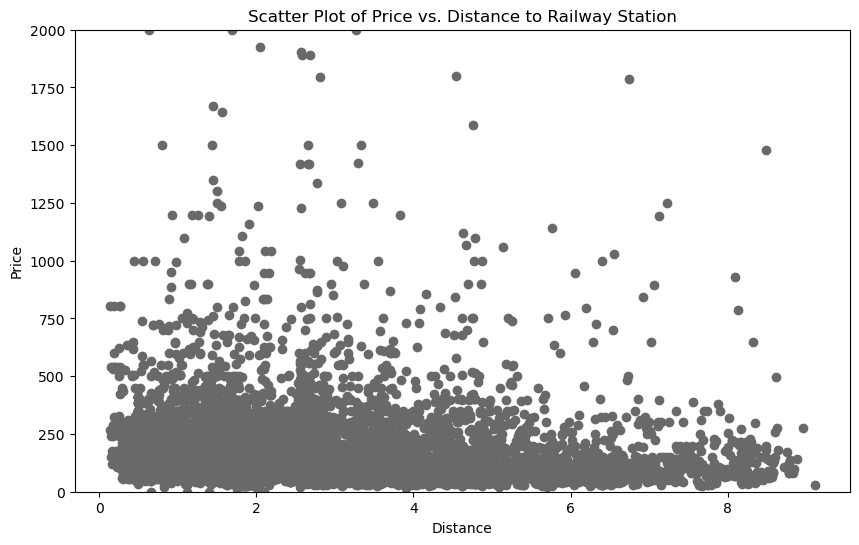

In [73]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(vwListings.distance_railway, vwListings.price, marker="o", color="dimgray")

axes.set_ylabel("Price")
axes.set_xlabel("Distance")
axes.set_title("Scatter Plot of Price vs. Distance to Railway Station")
plt.ylim(0,2000)
plt.show()
plt.close()

There appears to be no relationship between price and distance as the data spreads in an unclear pattern.

### Price vs. distance_mcpherson

We expect that distance to Mcpherson Square station is inversely proportional to price. The longer the distance, the lower the price.

Let's look first at correlation coefficients, for which we expect an inverse relation between price and distance.

In [74]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.distance_mcpherson)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.distance_mcpherson)[0])

r   =  -0.12884988784972612
rho =  -0.2805192526089882


Pearson's correlation coefficient, 𝑟 , is at -0.13, which indicates a weak negative relationship. Spearman's is also interesting at -0.28, which might indicate a weak monotonic relationship. Let's plot the data:

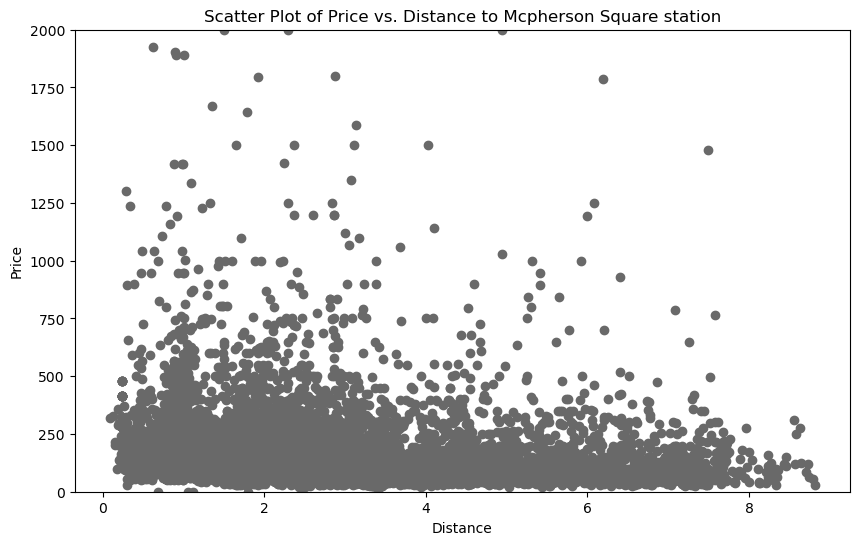

In [75]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(vwListings.distance_mcpherson, vwListings.price, marker="o", color="dimgray")

axes.set_ylabel("Price")
axes.set_xlabel("Distance")
axes.set_title("Scatter Plot of Price vs. Distance to Mcpherson Square station")
plt.ylim(0,2000)
plt.show()
plt.close()

There appears to be no relationship between price and distance as the data spreads in an unclear pattern.

### Price vs. number_of_reviews

We do not exepect the relation between price and number of review. Let's look first at correlation coefficients:

In [76]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.number_of_reviews)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.number_of_reviews)[0])

r   =  -0.052776544992956635
rho =  -0.04980961835551214


Pearson's correlation coefficient,  𝑟 , is only -0.05 which indicates a very weak negative relationship. Spearman's is at -0.04 which might indicate weak monotonic relationship. Let's plot the data:

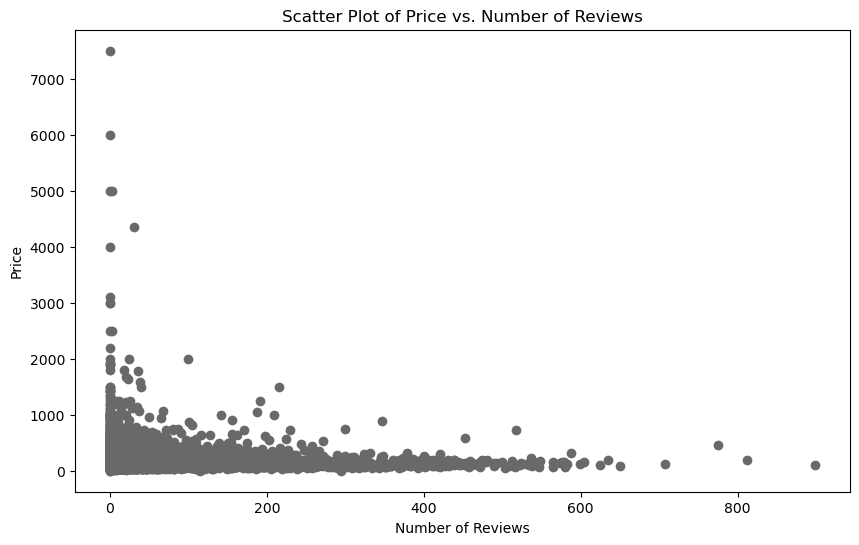

In [77]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( vwListings.number_of_reviews, vwListings.price, marker="o", color="dimgray")

axes.set_ylabel("Price")
axes.set_xlabel("Number of Reviews")
axes.set_title("Scatter Plot of Price vs. Number of Reviews")

plt.show()
plt.close()

There appears to be no relationship between price and number of reviews as the data spreads in an unclear pattern.

### Price vs. number_of_reviews_ltm

We do not exepect the relation between price and number of review in the last 12 months .Let's look first at correlation coefficients:

In [78]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.number_of_reviews_ltm)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.number_of_reviews_ltm)[0])

r   =  -0.027871192513552818
rho =  0.027991242610254086


Pearson's correlation coefficient, 𝑟 , is only -0.03 which indicates a very weak negative relationship. Spearman's is at 0.03 which might indicate weak monotonic relationship. Let's plot the data:

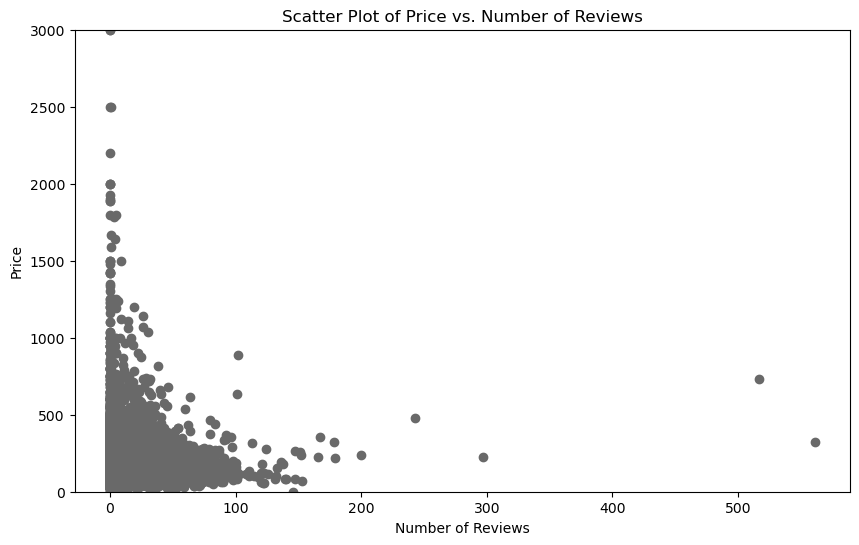

In [79]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( vwListings.number_of_reviews_ltm, vwListings.price, marker="o", color="dimgray")

axes.set_ylabel("Price")
axes.set_xlabel("Number of Reviews")
axes.set_title("Scatter Plot of Price vs. Number of Reviews")

plt.ylim(0,3000)
plt.show()
plt.close()

There appears to be no relationship between price and number of reviews in the last 12 months as the data spreads in an unclear pattern.

### Price vs. number_of_reviews_l30d

We do not exepect the relation between price and number of review in the last 30 days .Let's look first at correlation coefficients:

In [80]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.number_of_reviews_l30d)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.number_of_reviews_l30d)[0])

r   =  -0.03820355644263833
rho =  0.035636722785875194


Pearson's correlation coefficient, 𝑟 , is only -0.04 which indicates a very weak negative relationship. Spearman's is at 0.04 which might indicate weak monotonic relationship. Let's plot the data:

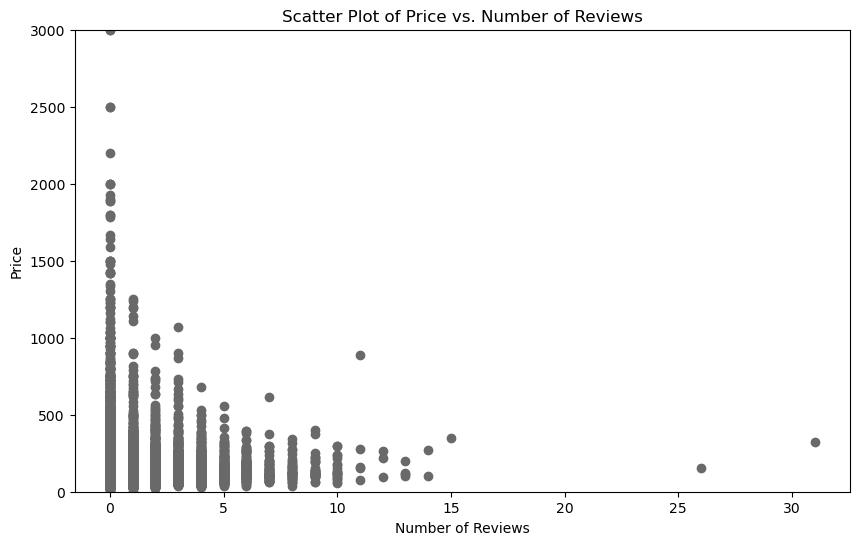

In [81]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( vwListings.number_of_reviews_l30d, vwListings.price, marker="o", color="dimgray")

axes.set_ylabel("Price")
axes.set_xlabel("Number of Reviews")
axes.set_title("Scatter Plot of Price vs. Number of Reviews")

plt.ylim(0,3000)
plt.show()
plt.close()

There appears to be no relationship between price and number of reviews in the last 30 days as the data spreads in an unclear pattern.

### Price vs. instant_bookable

We do not exepect that there are no diferent between price of instant bookable and price of no instant bookable.Let's look first at correlation coefficients:

In [82]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [83]:
describe_by_category(vwListings, "price", "instant_bookable", transpose=True)

instant_bookable            f            t
count             5767.000000  2861.000000
mean               176.207213   191.531632
std                246.785913   171.251880
min                  0.000000    16.000000
25%                 84.000000    89.000000
50%                126.000000   143.000000
75%                198.000000   240.000000
max               7500.000000  1903.000000


Let's plot histogram:

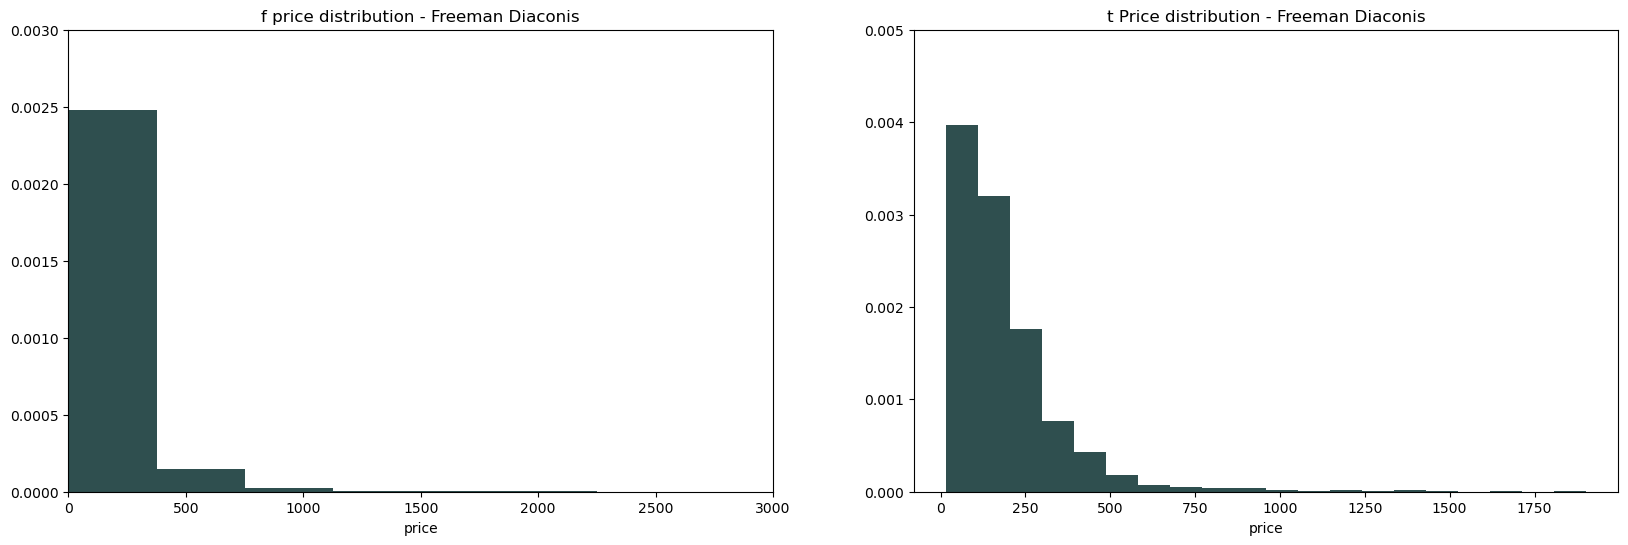

In [84]:
grouped = vwListings.groupby("instant_bookable")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(grouped["price"].get_group("f"),bins=20,color="darkslategray",density=True)
axes.set_title("f price distribution - Freeman Diaconis")
axes.set_xlabel("price")
axes.set_ylim((0,0.0030))
axes.set_xlim((0,3000))

axes = figure.add_subplot(1, 2, 2)
axes.hist(grouped["price"].get_group("t"),bins=20,color="darkslategray",density=True)
axes.set_title("t Price distribution - Freeman Diaconis")
axes.set_xlabel("price")
axes.set_ylim((0,0.005))

plt.show()
plt.close()

The price of "no" instant_bookable is concentrated between 0 and 500 dollars. While The price of "Yes" instant_bookable is concentrated between 0 and 250 dollars.

### Price vs. calculated_host_listings_count

We do not exepect the relation between price and calculated_host_listings_count .Let's look first at correlation coefficients:

In [85]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.calculated_host_listings_count)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.calculated_host_listings_count)[0])

r   =  -0.024551483117124445
rho =  0.07365842721019396


Pearson's correlation coefficient, 𝑟 , is only -0.03 which indicates a very weak negative relationship. Spearman's is at 0.07 which might indicate weak monotonic relationship. Let's plot the data:

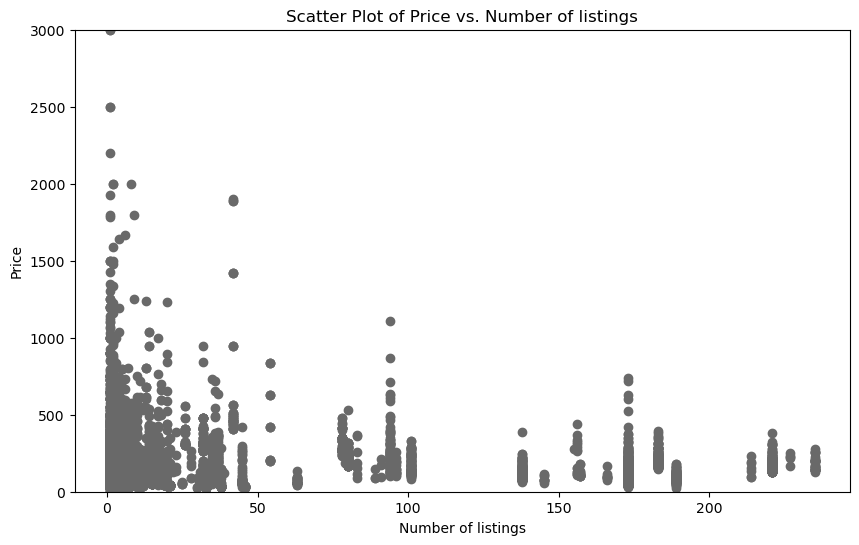

In [86]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( vwListings.calculated_host_listings_count, vwListings.price, marker="o", color="dimgray")

axes.set_ylabel("Price")
axes.set_xlabel("Number of listings")
axes.set_title("Scatter Plot of Price vs. Number of listings")

plt.ylim(0,3000)
plt.show()
plt.close()

There appears to be no relationship between price and Host listings count as the data spreads in an unclear pattern.

### Price vs. calculated_host_listings_count_entire_homes

We do not exepect the relation between price and calculated_host_listings_count_entire_homes .Let's look first at correlation coefficients:

In [87]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.calculated_host_listings_count_entire_homes)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.calculated_host_listings_count_entire_homes)[0])

r   =  0.01805114809611721
rho =  0.29743286162201676


Pearson's correlation coefficient, 𝑟 , is only 0.02 which indicates a very weak positive relationship. Spearman's is at 0.30 which might indicate weak monotonic relationship. Let's plot the data:

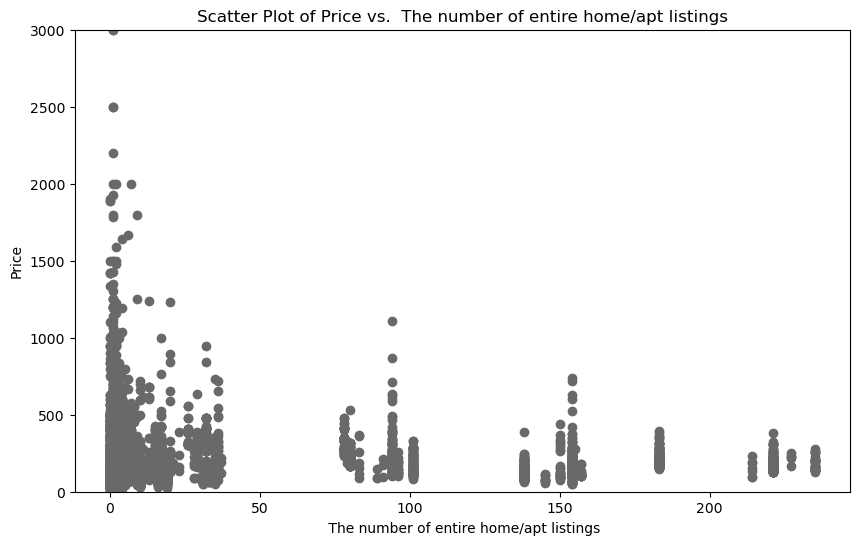

In [88]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( vwListings.calculated_host_listings_count_entire_homes, vwListings.price, marker="o", color="dimgray")

axes.set_ylabel("Price")
axes.set_xlabel(" The number of entire home/apt listings")
axes.set_title("Scatter Plot of Price vs.  The number of entire home/apt listings")

plt.ylim(0,3000)
plt.show()
plt.close()

There appears to be no relationship between price and the number of entire home/apt listings as the data spreads in an unclear pattern.

### Price vs. calculated_host_listings_count_private_rooms

We do not exepect the relation between price and calculated_host_listings_count_private_rooms .Let's look first at correlation coefficients:

In [89]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.calculated_host_listings_count_private_rooms)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.calculated_host_listings_count_private_rooms)[0])

r   =  -0.0770007935375237
rho =  -0.32908467109246686


Pearson's correlation coefficient, 𝑟 , is only -0.08 which indicates a very weak negative relationship. Spearman's is at -0.33 which might indicate weak monotonic relationship. Let's plot the data:

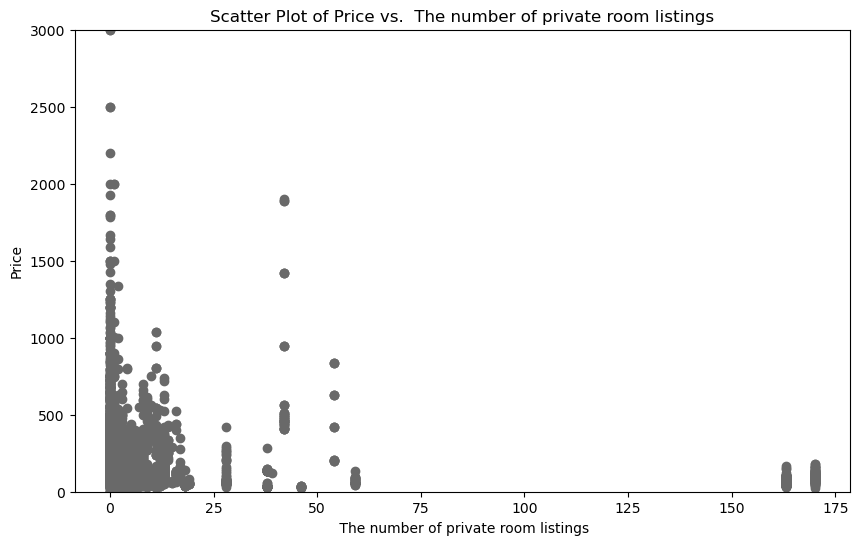

In [90]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( vwListings.calculated_host_listings_count_private_rooms, vwListings.price, marker="o", color="dimgray")

axes.set_ylabel("Price")
axes.set_xlabel(" The number of private room listings")
axes.set_title("Scatter Plot of Price vs.  The number of private room listings")

plt.ylim(0,3000)
plt.show()
plt.close()

There appears to be no relationship between price and the number of private room listings as the data spreads in an unclear pattern.

### Price vs. calculated_host_listings_count_shared_rooms

We do not exepect the relation between price and calculated_host_listings_count_shared_rooms .Let's look first at correlation coefficients:

In [91]:
print("r   = ", stats.pearsonr(vwListings.price.astype(float), vwListings.calculated_host_listings_count_shared_rooms)[0])
print("rho = ", stats.spearmanr(vwListings.price.astype(float), vwListings.calculated_host_listings_count_shared_rooms)[0])

r   =  -0.06168860271653512
rho =  -0.10359829089162524


Pearson's correlation coefficient, 𝑟 , is only -0.06 which indicates a very weak negative relationship. Spearman's is at -0.10 which might indicate weak monotonic relationship. Let's plot the data:

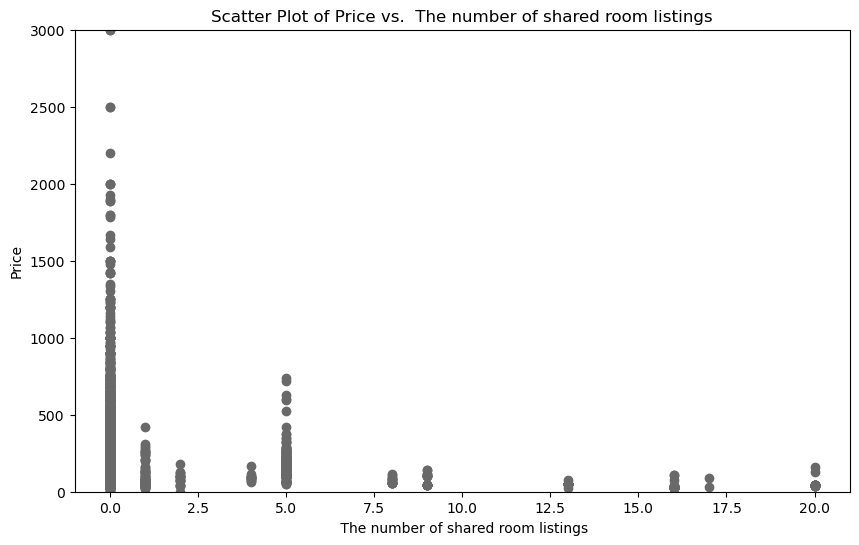

In [92]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( vwListings.calculated_host_listings_count_shared_rooms, vwListings.price, marker="o", color="dimgray")

axes.set_ylabel("Price")
axes.set_xlabel(" The number of shared room listings")
axes.set_title("Scatter Plot of Price vs.  The number of shared room listings")

plt.ylim(0,3000)
plt.show()
plt.close()

There appears to be no relationship between price and the number of shared room listings as the data spreads in an unclear pattern.

## EDA Calendar

In [93]:
# Read sqlite query results into a pandas DataFrame
calendar = pd.read_sql_query("SELECT * from most_recent_calendar", connection)

# List the columns in the reviews table
print(calendar.columns)

Index(['listing_id', 'MAX(date)', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'source_name'],
      dtype='object')


### Calendar

This table contains booking information of a listing for the next year. The corresponding prices for a listing for the next 365 days are included in this table, together with the information whether the listing is available at a particular day. This data is available for the years 2022 and 2023, where each of these data has been scraped one year before the year they contain information about. The table also contains the listing_id that is available in the listings table and through which the tables can be joined together.

In [94]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8626 entries, 0 to 8625
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   listing_id      8626 non-null   int64 
 1   MAX(date)       8626 non-null   object
 2   available       8626 non-null   object
 3   price           8626 non-null   object
 4   adjusted_price  8626 non-null   object
 5   minimum_nights  8626 non-null   int64 
 6   maximum_nights  8626 non-null   int64 
 7   source_name     8626 non-null   object
dtypes: int64(3), object(5)
memory usage: 539.2+ KB


In [95]:
calendar.head(5)

,listing_id,MAX(date),available,price,adjusted_price,minimum_nights,maximum_nights,source_name
0,3571,2023-09-13,t,$200.00,$200.00,90,730,calendar_9_2022
1,3686,2024-03-17,t,$67.00,$67.00,31,365,calendar_3_2023
2,3943,2024-03-17,t,$85.00,$85.00,1,1125,calendar_3_2023
3,4197,2024-03-17,t,$90.00,$90.00,14,1125,calendar_3_2023
4,4373,2023-09-13,t,$40.00,$40.00,28,1125,calendar_9_2022


## EDA : Single Variable EDA

We'll start our EDA by looking at each variable individually, starting with the target variable, price.

### Price

Price are the main variable of interest and represent a daily price in US dolllar. 

We'll start by looking at the summary statistics:

In [96]:
calendar.price.describe()

count        8626
unique        644
top       $100.00
freq          208
Name: price, dtype: object

We have to convert type of listing.price from object to float

In [97]:
dollar ='$'
calendar.price = [elem.replace(dollar,'') for elem in calendar.price]
comma = ','
calendar.price = [elem.replace(comma,'') for elem in calendar.price]

In [98]:
calendar.price

0       200.00
1        67.00
2        85.00
3        90.00
4        40.00
         ...  
8621    215.00
8622    602.00
8623    173.00
8624     84.00
8625    151.00
Name: price, Length: 8626, dtype: object

In [99]:
calendar['price'] = np.array(calendar['price'], dtype=float) 

In [100]:
calendar.price

0       200.0
1        67.0
2        85.0
3        90.0
4        40.0
        ...  
8621    215.0
8622    602.0
8623    173.0
8624     84.0
8625    151.0
Name: price, Length: 8626, dtype: float64

In [101]:
calendar.price.describe()

count     8626.000000
mean       218.808022
std        508.043550
min          0.000000
25%         87.000000
50%        130.000000
75%        210.000000
max      10000.000000
Name: price, dtype: float64

The variable is definitely skewed. The mean is 208.5 dollars and the median is 135 dollars, or about 35% lower. The 3rd quartile is nearly 24x the 1st quartile. the minimum is "only" 0 dollars while the maximum is 9,011 dolllars. Let's plot a histogram of the data:


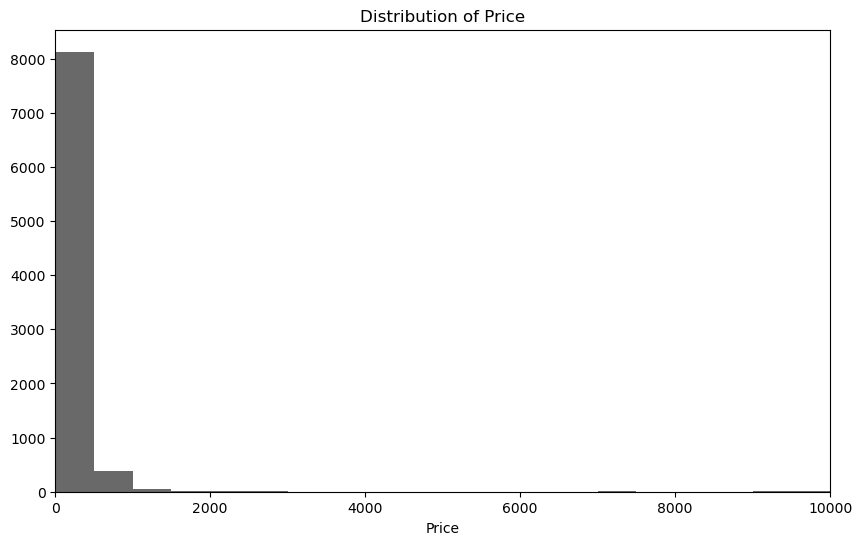

In [102]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(calendar.price, color="dimgray", bins = 20)
axes.set_title("Distribution of Price")
axes.set_xlabel("Price")

plt.xlim(0,10000)
#plt.ylim(0,1000000)
plt.show()
plt.close()

Let's look at distribution:

In [103]:
calendar.price.value_counts(normalize=False)

100.0     208
150.0     165
99.0      146
125.0     130
119.0     123
         ... 
655.0       1
520.0       1
1005.0      1
672.0       1
605.0       1
Name: price, Length: 644, dtype: int64

Most of the room price is in the range of 0-150 dollars. The distribution is not normally distributed. 

### listing_id

listing_id is unique indentifier for listing

In [104]:
calendar.listing_id.value_counts()

3571                  1
52563674              1
52629128              1
52615864              1
52615325              1
                     ..
32492660              1
32492651              1
32476053              1
32464624              1
849521381332726773    1
Name: listing_id, Length: 8626, dtype: int64

There are 8626 listing id.

### Available

Available is a categorical variable.

In [105]:
calendar.available.value_counts()

f    4459
t    4167
Name: available, dtype: int64

There are boolean variables: available (T) or not available (F). Most rooms are not available.

### Adjusted price

We do not have much information about the adjusted price. Airbnb allows a host to request a pricing change. If customer accepted the change, they will pay the new rate.

In [106]:
calendar.adjusted_price.describe()

count        8626
unique        648
top       $100.00
freq          207
Name: adjusted_price, dtype: object

The data looks the same as 'price'. Since we already did EDA of the price, we do not need an adjusted price.

### Minimum nights

Minimum night is the minimum number of nights stay for listings.

In [107]:
calendar["minimum_nights"].describe()

count    8626.000000
mean       35.449339
std        81.185479
min         1.000000
25%         2.000000
50%        14.000000
75%        31.000000
max      1125.000000
Name: minimum_nights, dtype: float64

In [108]:
calendar.minimum_nights.value_counts()

31     2791
1      1507
2      1415
3       732
91      348
       ... 
48        1
22        1
600       1
135       1
17        1
Name: minimum_nights, Length: 75, dtype: int64

The minimum nights has wide range. The most minimum nights is 31 days which is quite long stay.  

### Maximum nights

Maximum night is the maximum number of nights stay for listings.

In [109]:
calendar["maximum_nights"].describe()

count    8.626000e+03
mean     1.495691e+06
std      5.662070e+07
min      1.000000e+00
25%      3.650000e+02
50%      1.125000e+03
75%      1.125000e+03
max      2.147484e+09
Name: maximum_nights, dtype: float64

In [110]:
calendar.maximum_nights.value_counts()

1125    5372
365     1425
30       165
731      162
90       135
        ... 
420        1
38         1
225        1
750        1
67         1
Name: maximum_nights, Length: 127, dtype: int64

The maximum nights has wide range. The most maximum nights is 1125 days which is quite long stay.

## Pairwiswe EDA

As the target variable is price, we will focus on every variable in relation to price.

### Price vs. Available

In [111]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [112]:
describe_by_category(calendar, "price", "available", transpose=True)

available            f             t
count      4459.000000   4167.000000
mean        227.035434    210.004080
std         440.053422    571.838811
min           0.000000     10.000000
25%          94.000000     80.000000
50%         139.000000    123.000000
75%         220.000000    200.000000
max        9000.000000  10000.000000


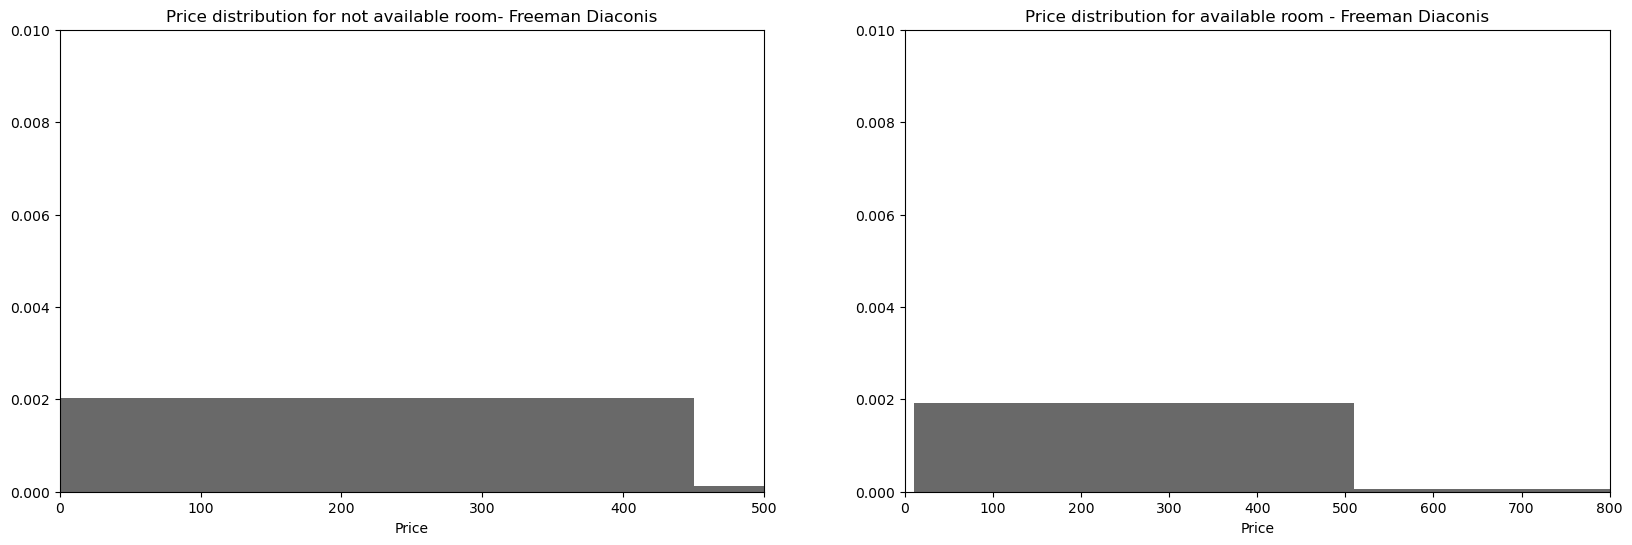

In [113]:
grouped = calendar.groupby("available")

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.hist(grouped["price"].get_group("f"),bins=20,color="dimgray",density=True)
axes.set_title("Price distribution for not available room- Freeman Diaconis")
axes.set_xlabel("Price")
axes.set_ylim((0,0.010))
axes.set_xlim((0,500))

axes = figure.add_subplot(1, 2, 2)
axes.hist(grouped["price"].get_group("t"),bins=20,color="dimgray",density=True)
axes.set_title("Price distribution for available room - Freeman Diaconis")
axes.set_xlabel("Price")
axes.set_ylim((0,0.010))
axes.set_xlim((0,800))

plt.show()
plt.close()

The data looks uniform distribution. The distribution for both available and not available looks the same. 

### Price vs. Minimum nights

We expect that the larger the minimum, the lower the average price per night.

In [114]:
describe_by_category(calendar, "price", "minimum_nights", transpose=True)

minimum_nights         1            2            3            4     \
count           1507.000000  1415.000000   732.000000   331.000000   
mean             253.881221   220.572438   242.366120   310.078550   
std              614.404753   313.045616   255.816394   454.639871   
min                0.000000    35.000000    31.000000    31.000000   
25%               85.000000   106.000000   115.750000   125.000000   
50%              130.000000   150.000000   169.000000   195.000000   
75%              226.500000   247.000000   290.500000   310.500000   
max             9000.000000  7500.000000  3048.000000  4084.000000   

minimum_nights         5           6            7           8      9     \
count            142.000000   29.000000   112.000000    3.000000    3.0   
mean             259.591549  209.034483   287.160714  120.666667  171.0   
std              297.937429  175.865712   343.924268   66.214299    2.0   
min               37.000000   73.000000    29.000000   68.000000  169

It is seen that the number of minimum nights is not related to price. The larger number of nights does not mean a lower price per day.

### Price vs. Maximum nights

In [115]:
describe_by_category(calendar, "price", "maximum_nights", transpose=True)

maximum_nights   1           2           3           4           5           \
count             87.000000    7.000000    6.000000    6.000000   24.000000   
mean             688.781609  212.285714  115.000000  139.833333   98.250000   
std              593.587760   68.443929  117.972878   58.601763   50.637888   
min               12.000000   80.000000   32.000000   80.000000   35.000000   
25%              209.000000  194.500000   56.250000  115.000000   53.250000   
50%              876.000000  229.000000   75.000000  122.000000   82.000000   
75%              999.000000  244.500000   99.750000  144.750000  130.500000   
max             2999.000000  299.000000  350.000000  250.000000  200.000000   

maximum_nights  6            7           8           9            10          \
count             8.000000    55.000000    8.000000    2.000000    19.000000   
mean            181.125000   154.927273  226.125000  123.500000   255.473684   
std             221.190569   265.928343  312.913

t is seen that the number of maximum nights is not related to price. The larger number of nights does not mean a lower price per day.